In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
import seaborn as sns

In [43]:
datagen = ImageDataGenerator(
    rescale = 1./255, 
    # rotation_range = 5,
    # zoom_range = (0.90, 0.90),
    # brightness_range = (0.95, 0.95),
    # horizontal_flip = True,
    # vertical_flip = True,
    data_format = 'channels_last',
    validation_split = 0.2,
    dtype = tf.bfloat16
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataLeWagon/AlzheimersDataset/train',
    target_size = (224, 224),
    batch_size = (32),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed = 123
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataLeWagon/AlzheimersDataset/train',
    target_size = (224, 224),
    batch_size = (32),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed = 123
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [46]:
datagen2 = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 5,
    zoom_range = (0.90, 0.90),
    brightness_range = (0.95, 0.95),
    horizontal_flip = True,
    vertical_flip = True,
    data_format = 'channels_last',
    validation_split = 0.0,
    dtype = float
)

test_generator = datagen2.flow_from_directory(
    '/content/drive/MyDrive/AlzheimersDataLeWagon/Test128',
    target_size = (224, 224),
    batch_size = (4),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed = 123
)

Found 128 images belonging to 4 classes.


In [44]:
base_model = VGG19(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

In [45]:
base_model.trainable = False

In [46]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [47]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [48]:
model.layers

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC', 'accuracy', 'Recall', 'Precision'])

In [50]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [51]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[es])

Epoch 1/10
257/257 [==============================] - 1050s 4s/step - loss: 1.2693 - auc: 0.8052 - accuracy: 0.5366 - recall: 0.4937 - precision: 0.5556 - val_loss: 1.0543 - val_auc: 0.8075 - val_accuracy: 0.5161 - val_recall: 0.4516 - val_precision: 0.5335
Epoch 2/10
257/257 [==============================] - 62s 240ms/step - loss: 0.8843 - auc: 0.8693 - accuracy: 0.6259 - recall: 0.5681 - precision: 0.6574 - val_loss: 1.2002 - val_auc: 0.7788 - val_accuracy: 0.4721 - val_recall: 0.4096 - val_precision: 0.5270
Epoch 3/10
257/257 [==============================] - 61s 239ms/step - loss: 0.8355 - auc: 0.8808 - accuracy: 0.6410 - recall: 0.5849 - precision: 0.6694 - val_loss: 1.1129 - val_auc: 0.7854 - val_accuracy: 0.4946 - val_recall: 0.3871 - val_precision: 0.5183
Epoch 4/10
257/257 [==============================] - 62s 239ms/step - loss: 0.7426 - auc: 0.9010 - accuracy: 0.6713 - recall: 0.6125 - precision: 0.7086 - val_loss: 1.2328 - val_auc: 0.8070 - val_accuracy: 0.5308 - val_reca

In [52]:
model.evaluate(validation_generator)

64/64 [==============================] - 12s 193ms/step - loss: 1.0789 - auc: 0.8020 - accuracy: 0.5200 - recall: 0.4526 - precision: 0.5340


[1.0788708925247192,
 0.8019724488258362,
 0.5200390815734863,
 0.4525904059410095,
 0.5340253710746765]

In [53]:
y_pred = model.predict(validation_generator)

In [12]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [54]:
confusion_matrix(validation_generator.classes, np.argmax(y_pred, axis=1))

array([[  3,   0,  65,  75],
       [  1,   0,   3,   6],
       [ 15,   0, 216, 281],
       [  7,   0, 161, 190]])

In [55]:
print(classification_report(validation_generator.classes, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.12      0.02      0.04       143
           1       0.00      0.00      0.00        10
           2       0.49      0.42      0.45       512
           3       0.34      0.53      0.42       358

    accuracy                           0.40      1023
   macro avg       0.24      0.24      0.23      1023
weighted avg       0.38      0.40      0.38      1023



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


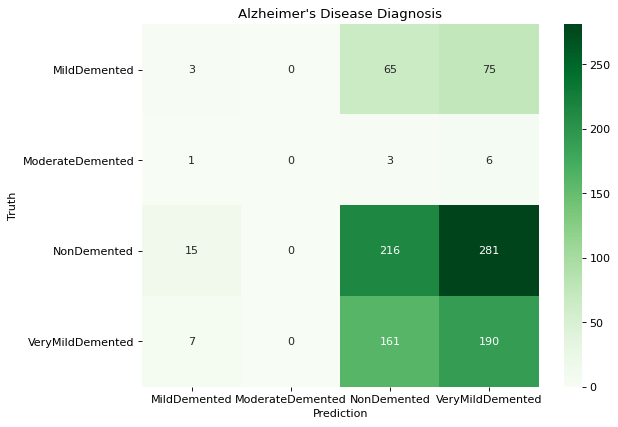

In [57]:
CLASSES = [ 'MildDemented',
            'ModerateDemented',
            'NonDemented',
            'VeryMildDemented']

conf_arr = confusion_matrix(validation_generator.classes, np.argmax(y_pred, axis=-1))

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)